In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
file =open('Small_files/logaa','r', errors='ignore')
file2 =open('replaced','w+')
contents=file.read()
for x in range(len(contents)):
    if contents[x] == ",":
        file2.write("!!@@@")
    else:
        file2.write(str(contents[x]))
file2.close()


In [3]:
names=["Month" ,"Day" ,"Time" , "Machine", "Application"]
df= pd.read_csv('replaced', sep=" " , usecols=range(5) ,names=names)

In [4]:
df["Application"] = df["Application"].replace({':':''}, regex=True)

In [5]:
lines=contents.split("\n")
wanted_lines=""
for index,line in enumerate(lines):
    columns=line.split(": ")
    columns[:-1]
    list_1=columns[1:]
    wanted= "!-!".join(list_1)
    wanted = ": ".join([columns[0],wanted])
    if index !=len(lines)-1:
        wanted_lines+=wanted+'\n'
file3 =open('replaced','w', errors='ignore')
file3.write(wanted_lines)
file3.close()

In [6]:
df2 = pd.read_csv('replaced', header=None, sep='\n' , encoding='latin-1')
df2 = df2[0].str.split(': ', expand=True)
df2["Info"]=df2[df2.columns[1:]].apply(lambda x: ': '.join(x.dropna().astype(str)),axis=1)

In [7]:
Structure = pd.DataFrame([df["Month"],df["Day"],df["Time"],df["Machine"],df["Application"]]) 
Structure=Structure.T

In [8]:
final=pd.concat([Structure ,df2["Info"]],axis=1)

The next cell changes the value of month to numbers

In [9]:
import datetime
for key, value in final["Month"].iteritems():
    month_name = value
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    month_number = datetime_object.month
    final["Month"][key]=month_number


In [10]:
final["Date"]=final.apply(lambda final: datetime.datetime(2020,final["Month"],final['Day']), axis=1)
for key, value in final["Date"].iteritems():
    final["Date"]=datetime.datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S').strftime('%d-%m-%y %H:%M:%S')

In [11]:
for key, value in final["Date"].iteritems():
    out=value.split(' ')
    final["Date"]= out[0]

In [12]:
final=final.drop(columns=["Month","Day"])

In [13]:
cols = final.columns.tolist()
cols = cols[-1:] + cols[:-1]
final=final[cols]

In [14]:
Application_Values=final["Application"].value_counts()

In [15]:
final["Info"] = final["Info"].replace({'!-!':': '}, regex=True)

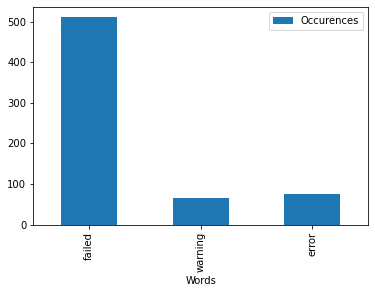

In [16]:
def occur(alist,final):
    out=[]
    final['New'] = final['Info'].str.replace('\W', ' ')
    for item in alist:
        final["a"]=final["New"].apply(lambda x: 1 if item.lower() in str(x).lower().split() else 0)
        sum=final["a"].sum()
        final=final.drop(columns=["a"])
        out.append(sum)
    Data={"Words":alist , "Occurences": out}
    df = pd.DataFrame(Data,columns=['Words','Occurences'])
    x=df.plot(x ='Words', y='Occurences', kind = 'bar')   
occur(["failed","warning","error"],final)

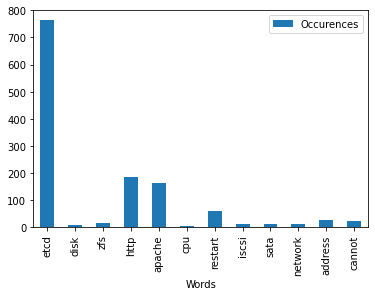

In [17]:
list_words=["etcd","disk","zfs","http","apache","cpu","restart","iscsi","sata","network","address","cannot"]
occur(list_words,final)

In [18]:
final=final.drop(columns=["a"])


In [19]:
from collections import Counter
final['New'] = final['Info'].str.replace('\W', ' ')
Counter(" ".join(final["New"]).split()).most_common(10)

[('pdhcp2712018702', 12590),
 ('dhcp31371', 10927),
 ('0', 9308),
 ('1', 8820),
 ('name', 7290),
 ('host', 7284),
 ('pool', 7107),
 ('ONLINE', 6907),
 ('sdc', 4729),
 ('status', 4549)]

In [20]:
final['New'] = final['Info'].str.replace('\W', ' ')

In [37]:
 pd.Series(' '.join(final['New']).lower().split()).value_counts()[:60]

pdhcp2712018702                      12590
dhcp31371                            10927
0                                     9308
1                                     8820
name                                  7848
host                                  7292
pool                                  7107
online                                6908
sdc                                   4729
status                                4600
changeop                              4379
2020                                  4172
0b                                    3826
used                                  3638
snapshots                             3635
stripe                                3622
time                                  3036
may                                   2919
snapperiod                            2904
refcompressratio                      2900
quota                                 2900
usedbysnapshots                       2900
creation                              2900
fullname   

In [22]:
def return_index_for_aword(word):
    ind=[]
    for key, value in final["New"].iteritems():
        if word.lower() in value.lower().split():
            ind+=[key]
    return ind
return_index_for_aword("hang")

[]

In [23]:
def return_rows_for_aword(words):
    out={}
    for word in words:
        alist=[]
        for item in return_index_for_aword(word):
            alist+=[final.loc[item,"Info"]]
        adf=pd.DataFrame(alist,columns=["Specific"])
        adf['Specific'] = adf['Specific'].str.replace('\W', ' ')
        out[word]=dict(pd.Series(' '.join(adf["Specific"]).lower().split()).value_counts()[:10])
    return out
def most_common(wods):
    x=return_rows_for_aword(wods)
    for key,value in x.items():
        c=[]
        d=[]
        for a , b in value.items():
            c+=[a]
            d+=[b]
        Data={key:c , "Occurences": d}
        df = pd.DataFrame(Data,columns=[key,'Occurences'])
        df.plot(x =key, y='Occurences', kind = 'bar')   
       

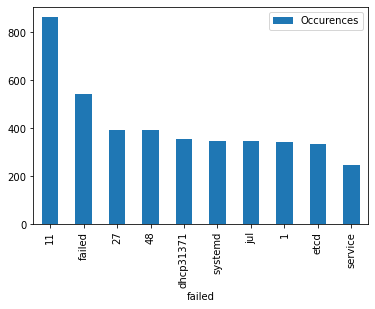

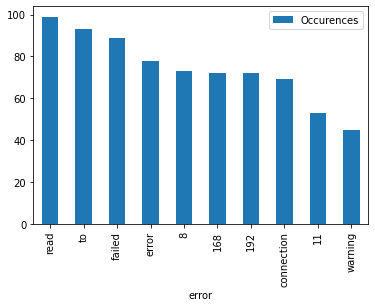

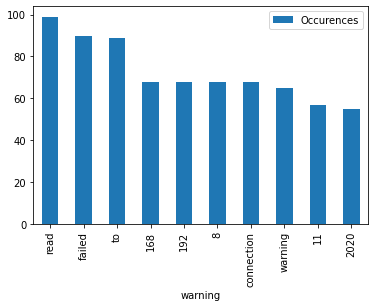

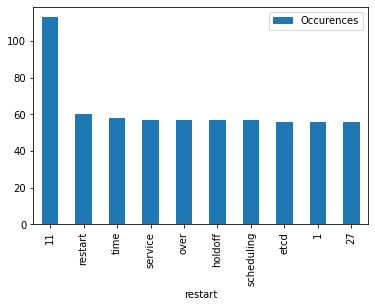

In [24]:
most_common(["failed","error","warning","restart"])

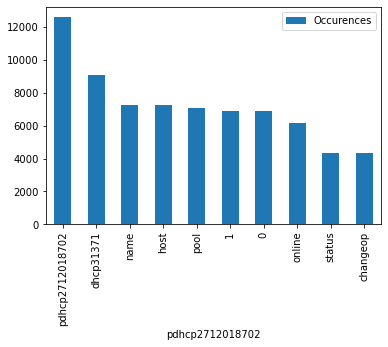

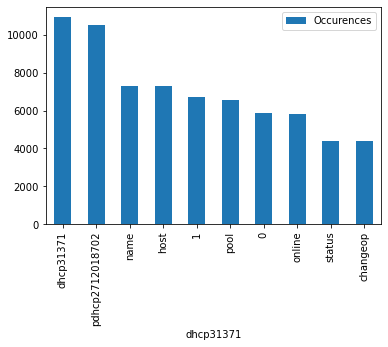

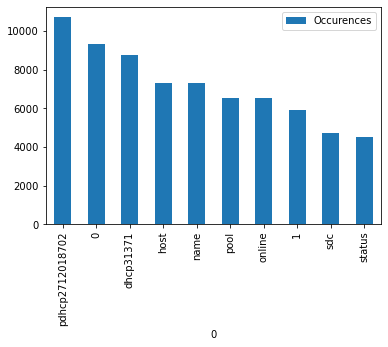

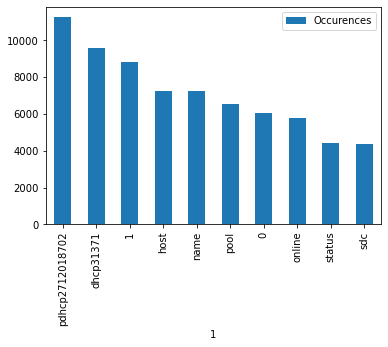

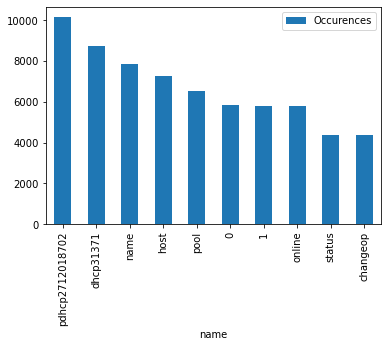

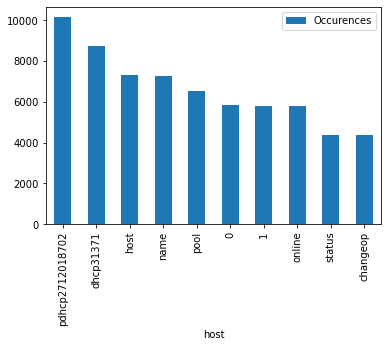

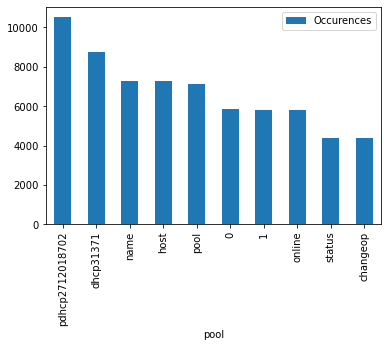

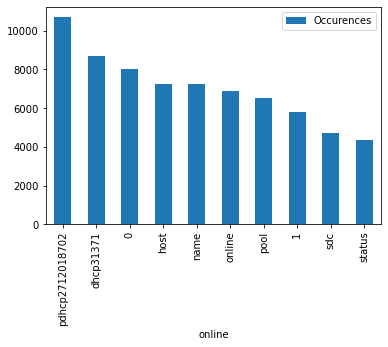

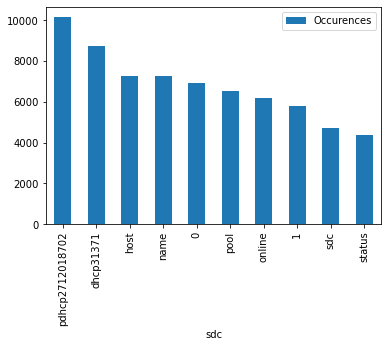

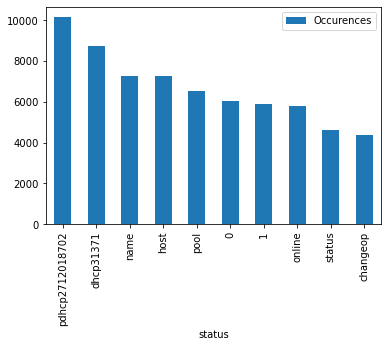

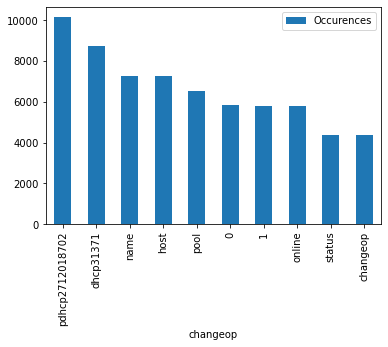

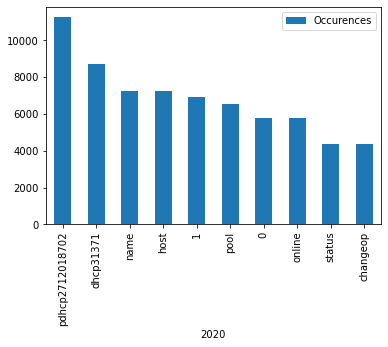

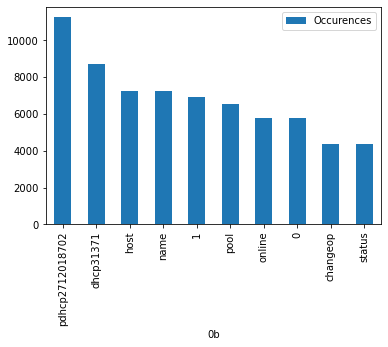

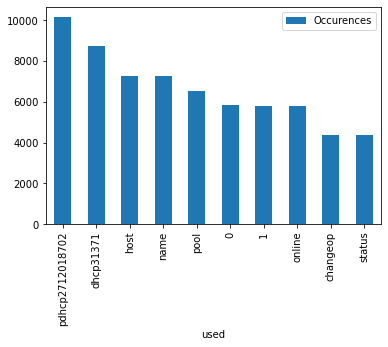

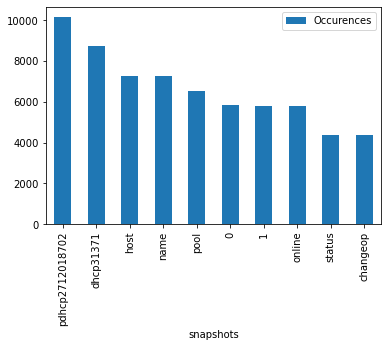

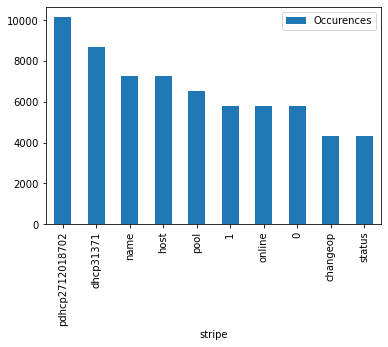

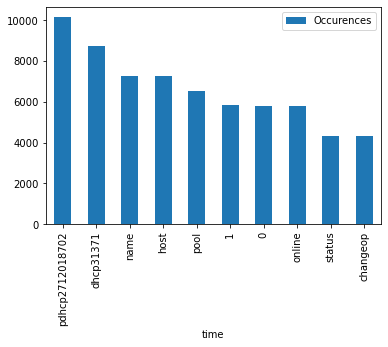

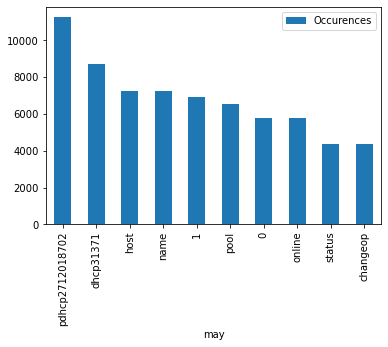

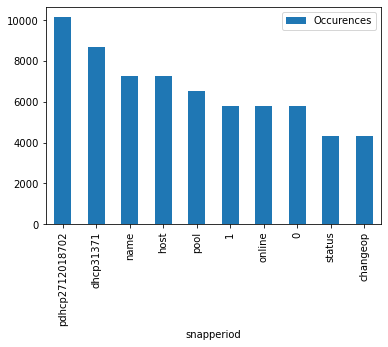

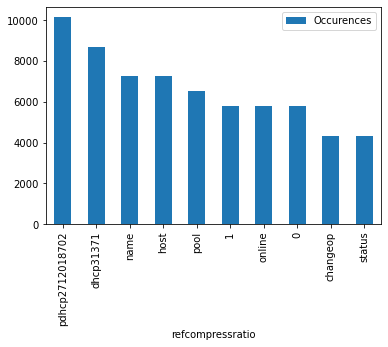

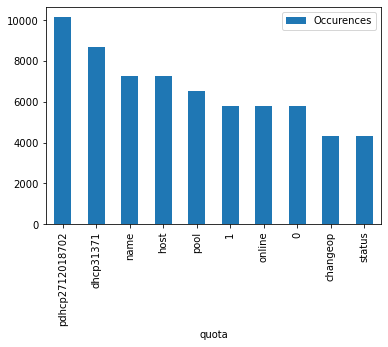

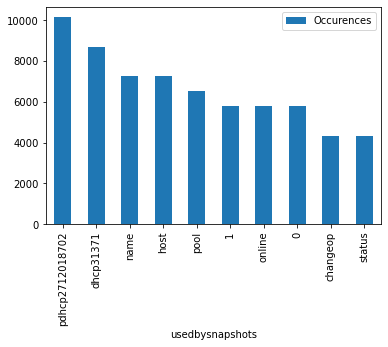

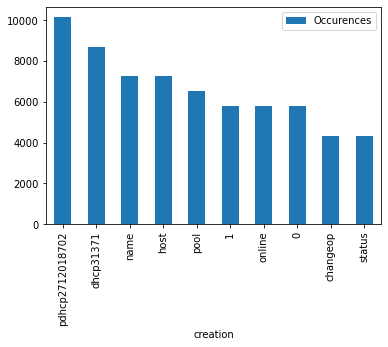

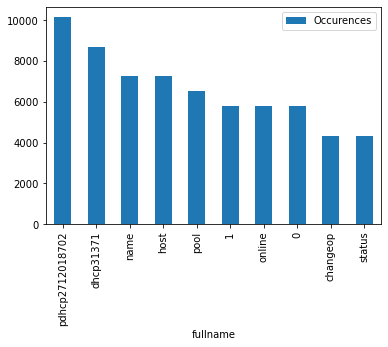

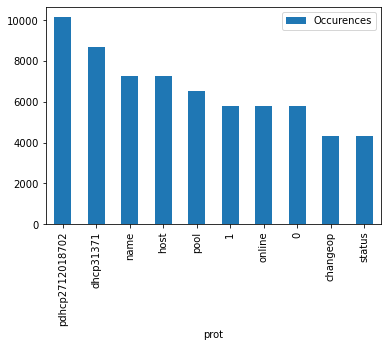

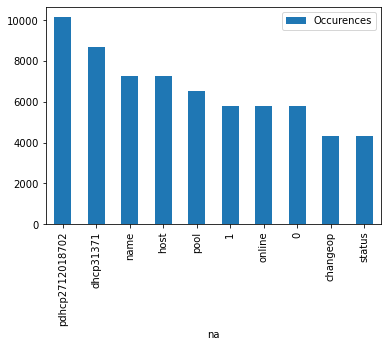

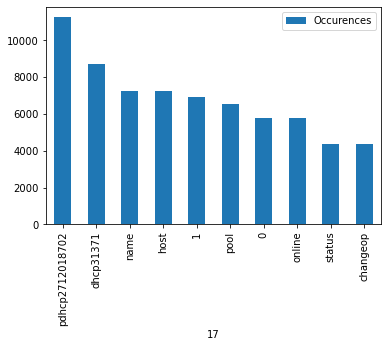

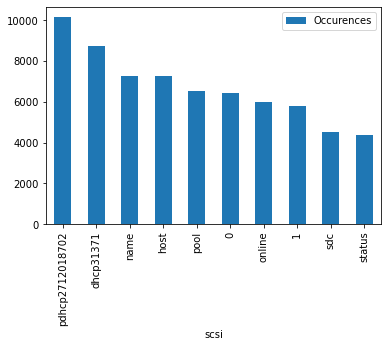

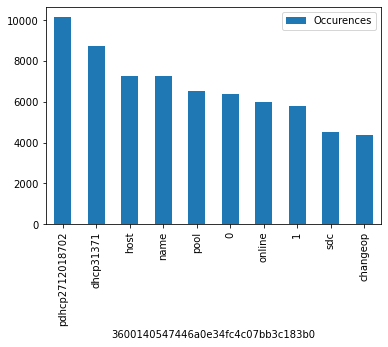

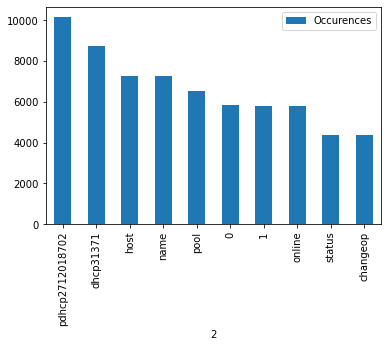

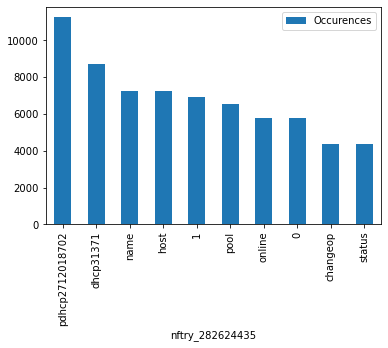

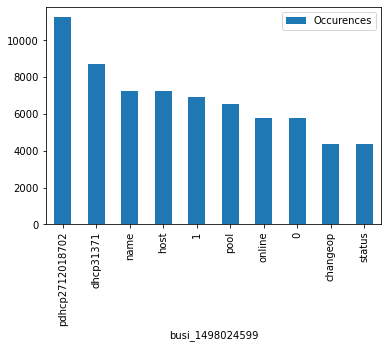

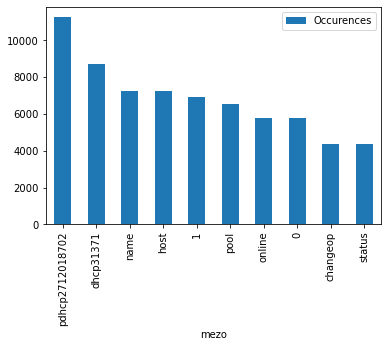

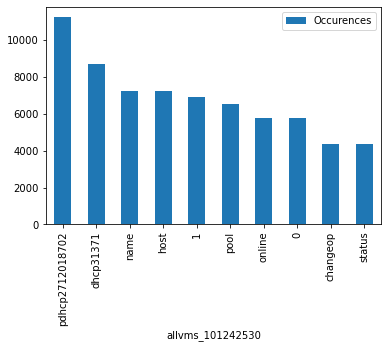

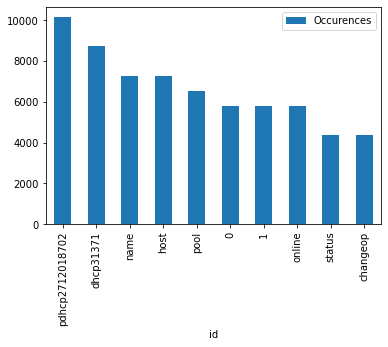

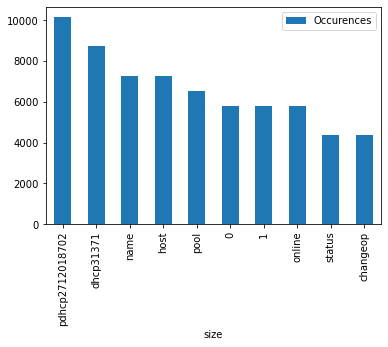

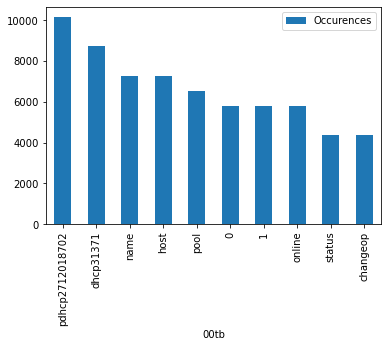

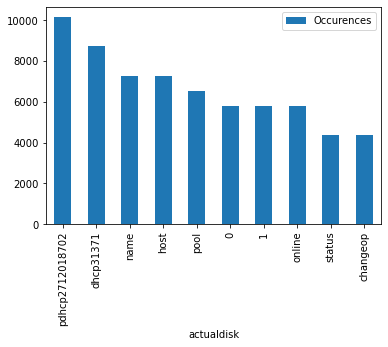

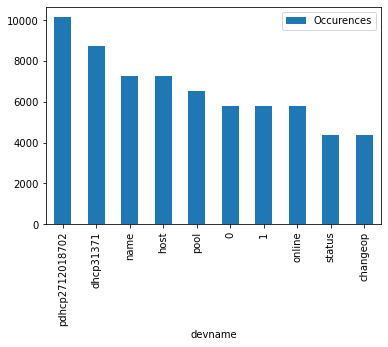

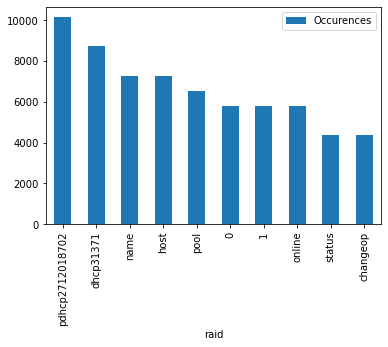

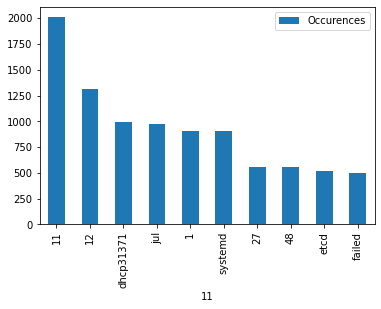

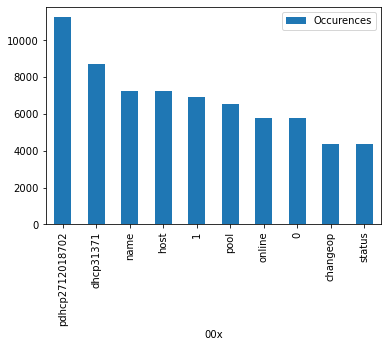

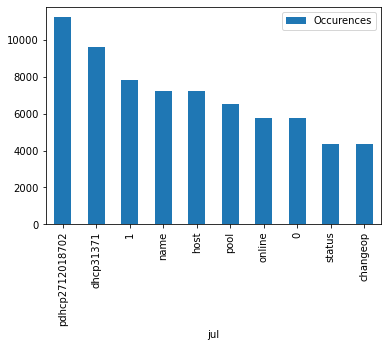

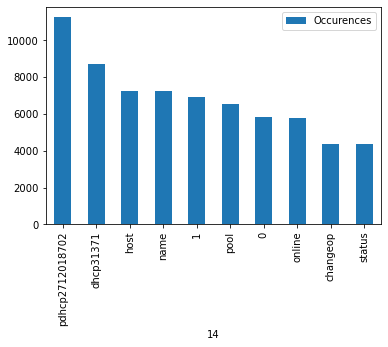

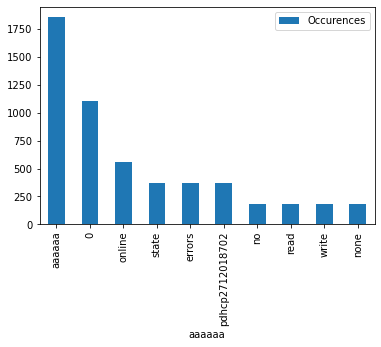

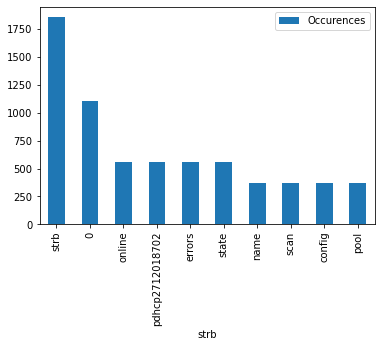

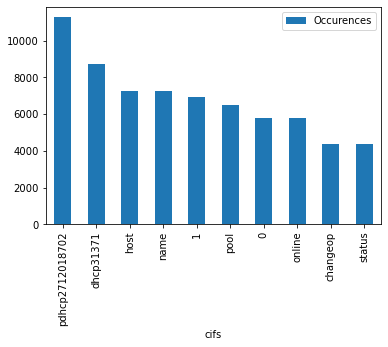

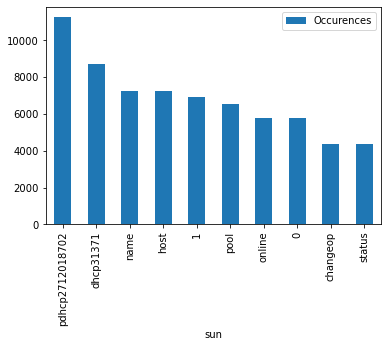

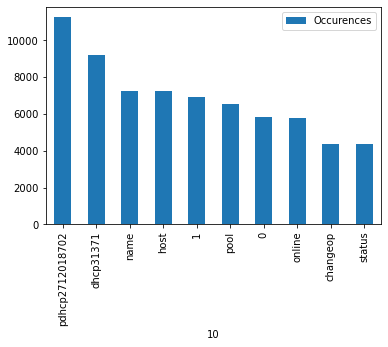

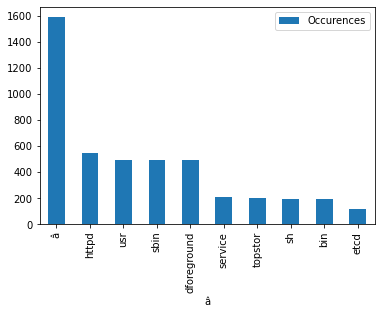

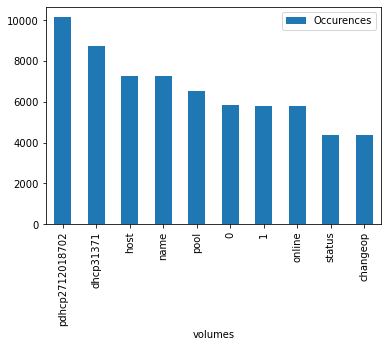

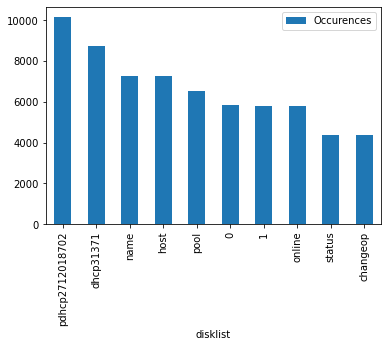

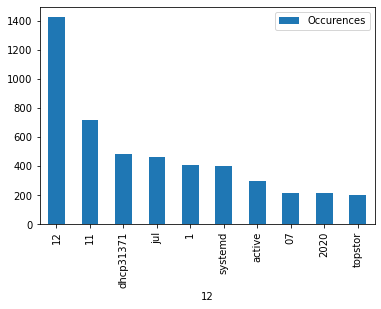

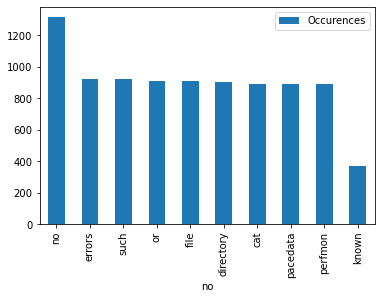

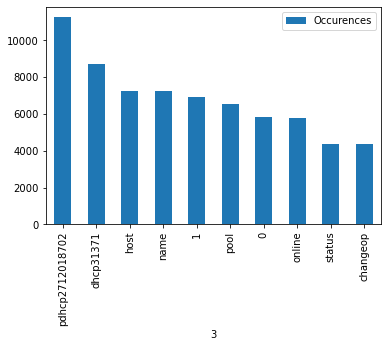

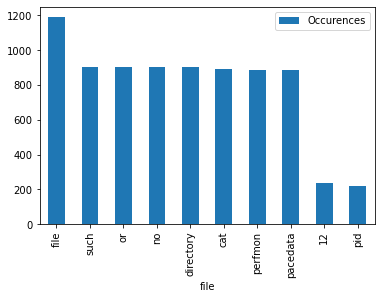

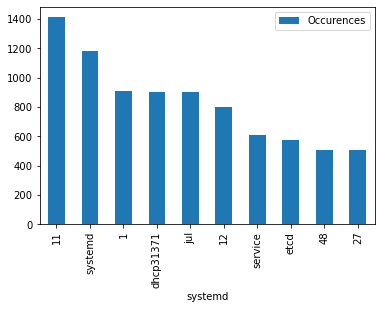

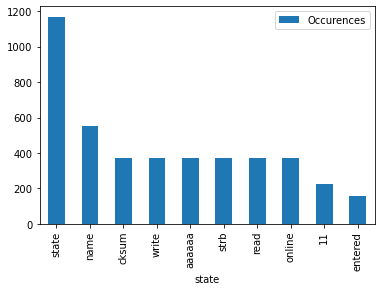

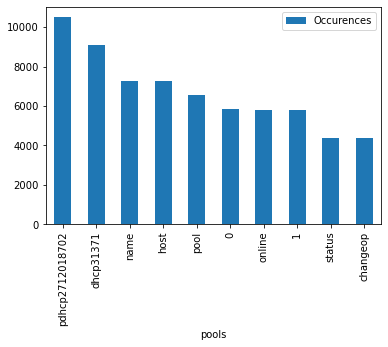

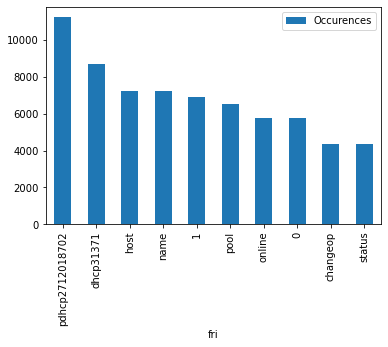

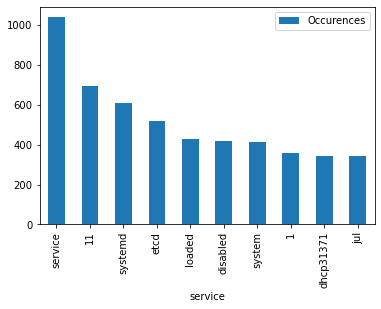

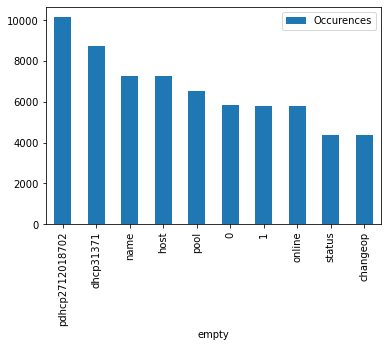

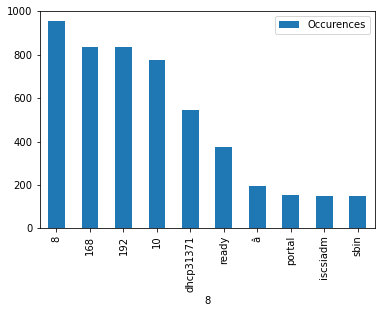

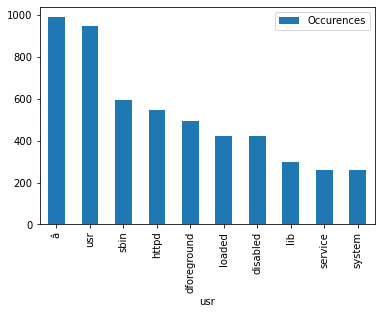

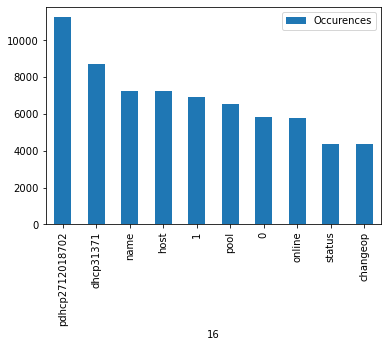

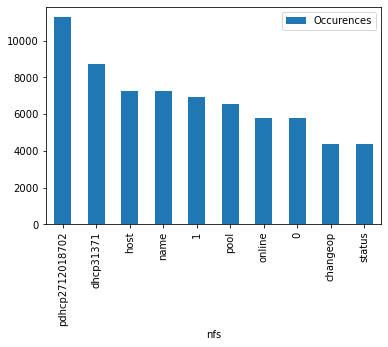

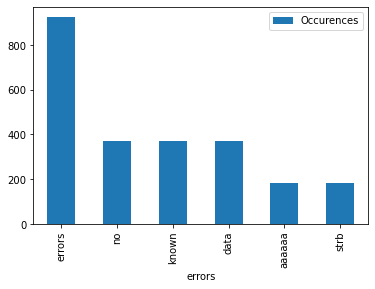

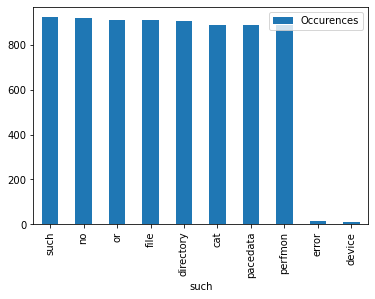

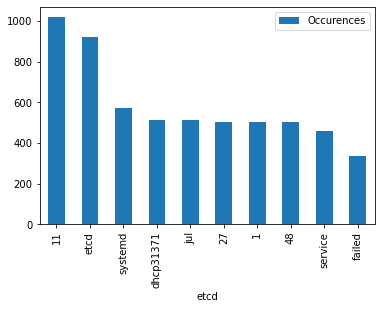

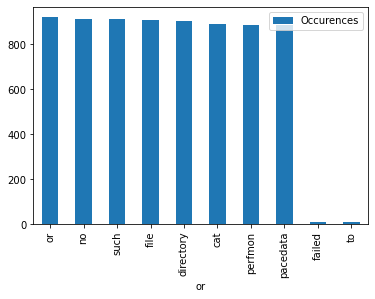

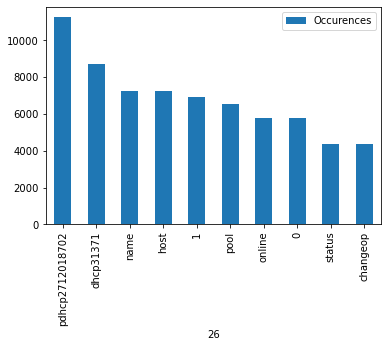

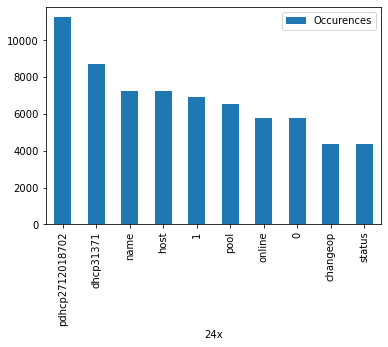

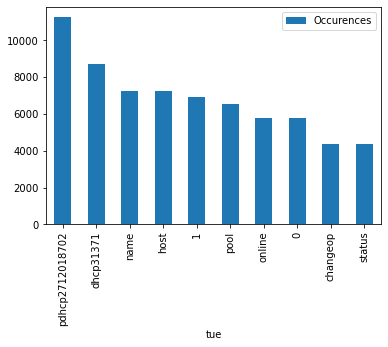

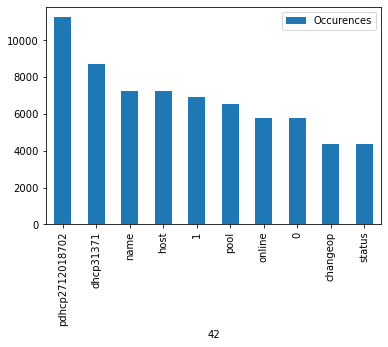

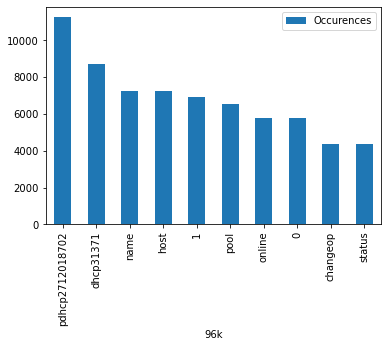

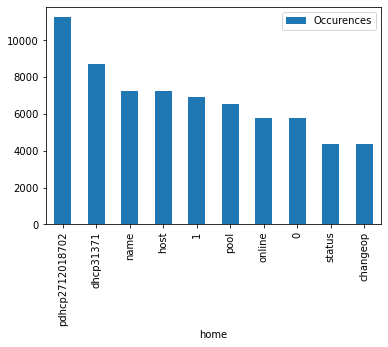

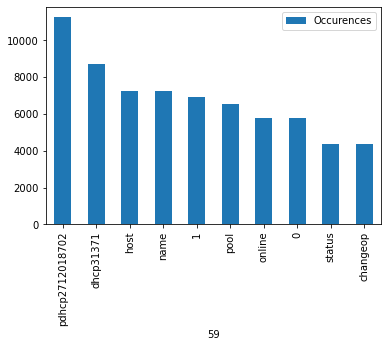

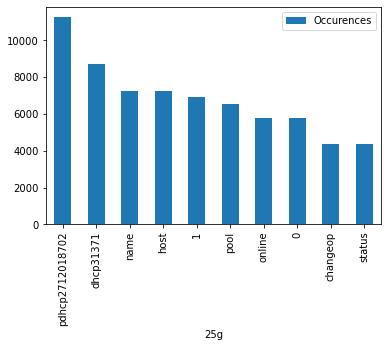

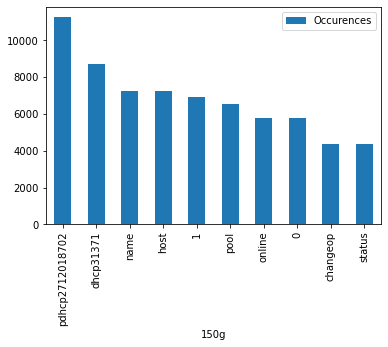

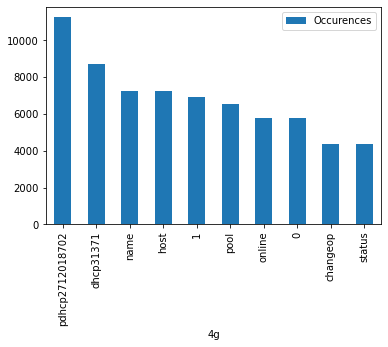

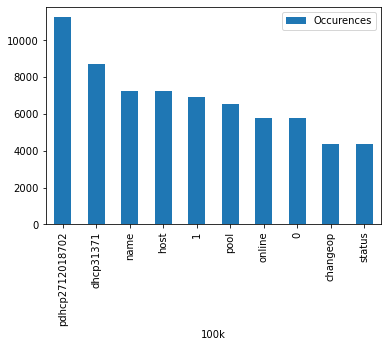

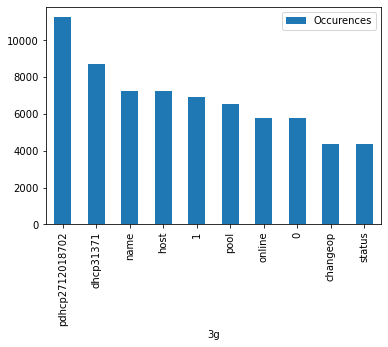

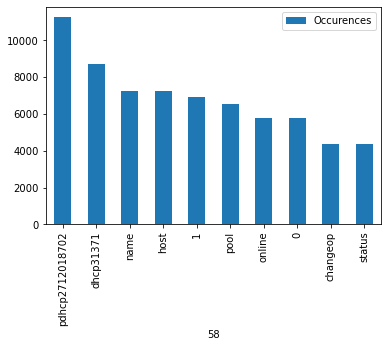

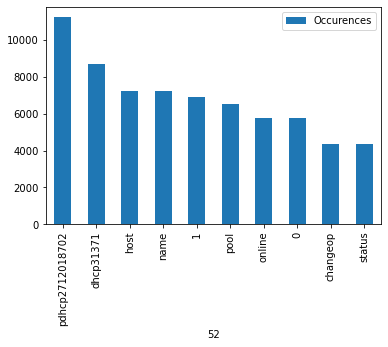

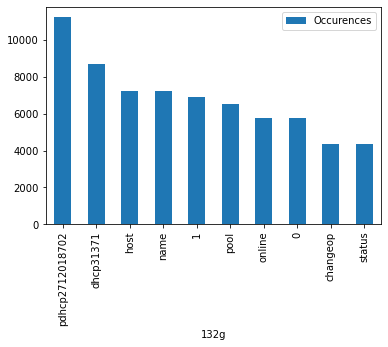

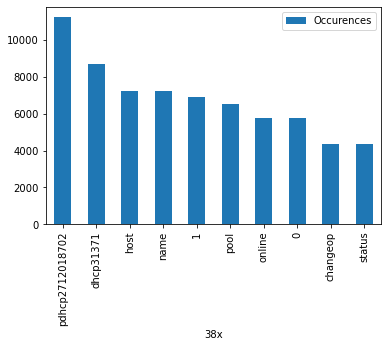

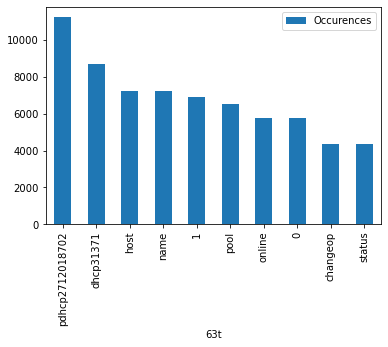

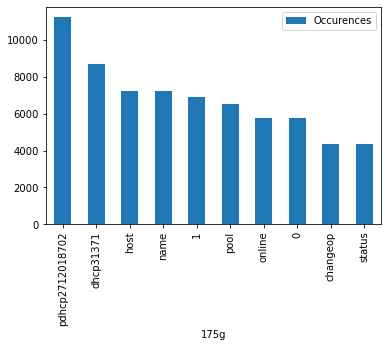

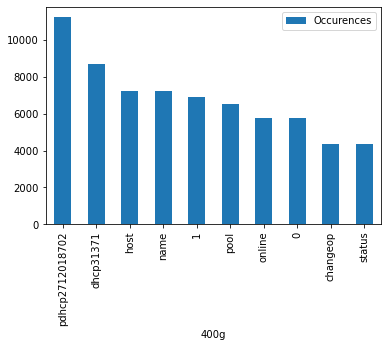

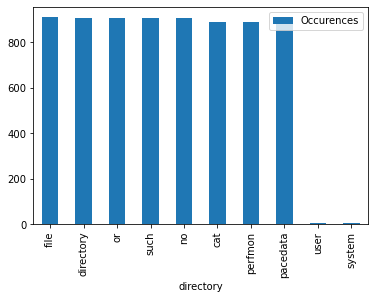

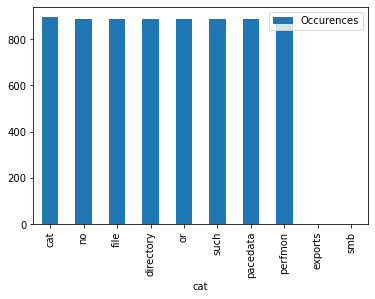

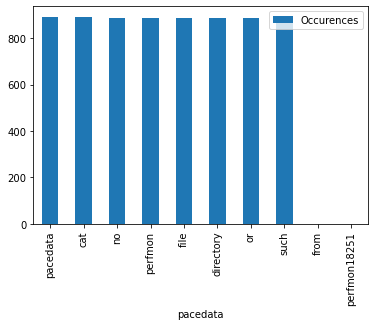

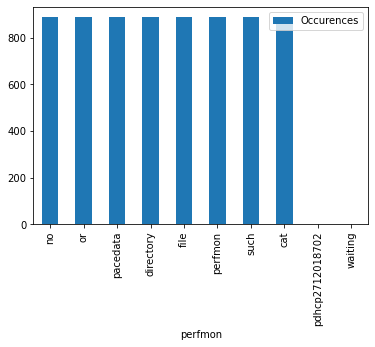

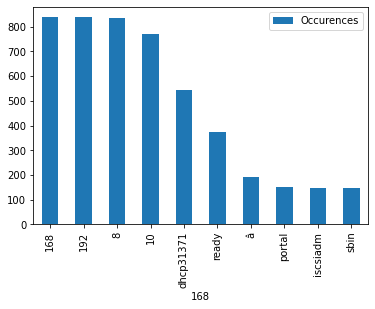

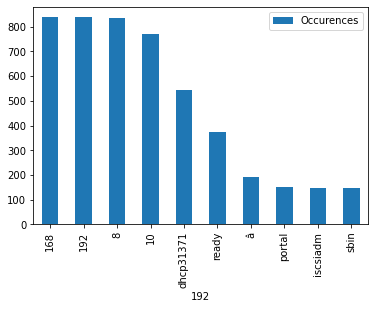

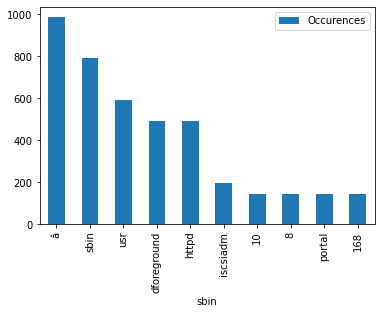

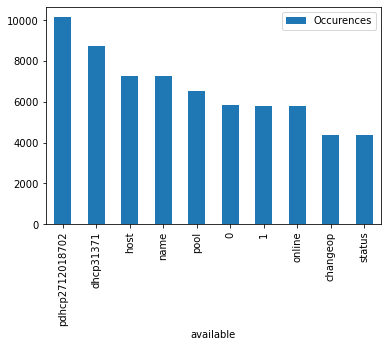

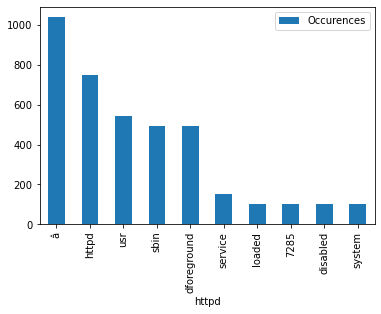

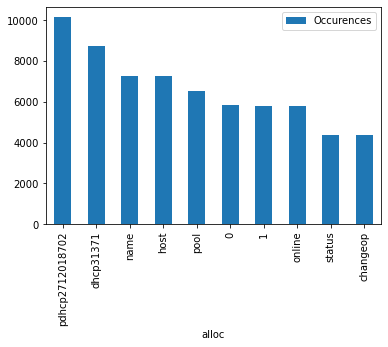

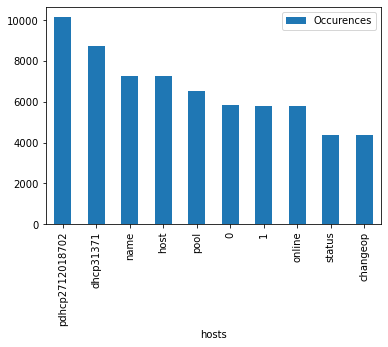

In [25]:
def getList(dict): 
    return list(dict.keys()) 
a=dict(pd.Series(' '.join(final['New']).lower().split()).value_counts()[:10])
b=getList(a)
most_common(b)




In [38]:
 pd.Series(' '.join(final['New']).lower().split()).value_counts()[:60]

pdhcp2712018702                      12590
dhcp31371                            10927
0                                     9308
1                                     8820
name                                  7848
host                                  7292
pool                                  7107
online                                6908
sdc                                   4729
status                                4600
changeop                              4379
2020                                  4172
0b                                    3826
used                                  3638
snapshots                             3635
stripe                                3622
time                                  3036
may                                   2919
snapperiod                            2904
refcompressratio                      2900
quota                                 2900
usedbysnapshots                       2900
creation                              2900
fullname   